### I have a sample dataset where we have total amount of transaction from 2017 to 2024. Now I will try to build some model to forecast future transaction amount. I will use ARIMA, LSTM and PROPHET model to forecast will see which one is doing better job.<br>In this part, I will use ARIMA model.<br>Letter I will use LSTM and PROPHET respectively.

# Importing Library and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
df=pd.read_csv('/content/drive/MyDrive/transaction data2.csv')
df.head()

,datetime,trans_count,trans_amount
0,2017-01-01 09:56:10,1,848.0
1,2017-01-01 10:08:41,1,500.0
2,2017-01-01 10:10:37,1,471.0
3,2017-01-01 10:21:16,1,110.0
4,2017-01-01 10:26:19,1,0.0


In [3]:
df1=df[['datetime','trans_amount']]
df1.head()

,datetime,trans_amount
0,2017-01-01 09:56:10,848.0
1,2017-01-01 10:08:41,500.0
2,2017-01-01 10:10:37,471.0
3,2017-01-01 10:21:16,110.0
4,2017-01-01 10:26:19,0.0


In [7]:
df1.rename(columns={'datetime': 'date','trans_amount': 'transamount'}, inplace=True)

In [8]:
df1.head()

,date,transamount
0,2017-01-01 09:56:10,848.0
1,2017-01-01 10:08:41,500.0
2,2017-01-01 10:10:37,471.0
3,2017-01-01 10:21:16,110.0
4,2017-01-01 10:26:19,0.0


In [10]:
df1['date'] = pd.to_datetime(df1['date'])
df1.head()

,date,transamount
0,2017-01-01 09:56:10,848.0
1,2017-01-01 10:08:41,500.0
2,2017-01-01 10:10:37,471.0
3,2017-01-01 10:21:16,110.0
4,2017-01-01 10:26:19,0.0


In [11]:
df1.set_index('date', inplace=True)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11976846 entries, 2017-01-01 09:56:10 to 2024-03-31 19:45:44
Data columns (total 1 columns):
 #   Column       Dtype  
---  ------       -----  
 0   transamount  float64
dtypes: float64(1)
memory usage: 182.8 MB


In [13]:
df1.shape

(11976846, 1)

# Resampling data as month starting

In [14]:
ts=df1['transamount'].resample('MS').sum()
ts

date
2017-01-01    4.977332e+07
2017-02-01    4.262793e+07
2017-03-01    5.308049e+07
2017-04-01    4.969003e+07
2017-05-01    4.180399e+07
                  ...     
2023-11-01    1.045445e+10
2023-12-01    9.791298e+09
2024-01-01    1.124518e+10
2024-02-01    1.044804e+10
2024-03-01    9.739796e+09
Freq: MS, Name: transamount, Length: 87, dtype: float64

In [15]:
df3=pd.DataFrame(ts)
df3.head()

,transamount
date,
2017-01-01,49773319.66
2017-02-01,42627926.21
2017-03-01,53080485.63
2017-04-01,49690031.66
2017-05-01,41803989.44


In [17]:
df3['transamount'] = df3['transamount'].astype('int64')
df3.head(24)

,transamount
date,
2017-01-01,49773320
2017-02-01,42627928
2017-03-01,53080484
2017-04-01,49690032
2017-05-01,41803988
2017-06-01,32825012
2017-07-01,44497128
2017-08-01,86564128
2017-09-01,95985872


In [18]:
df3.describe().astype('int64')

,transamount
count,87
mean,4258417783
std,3503338411
min,32825012
25%,1324095360
50%,3639247872
75%,7099861504
max,11245182976


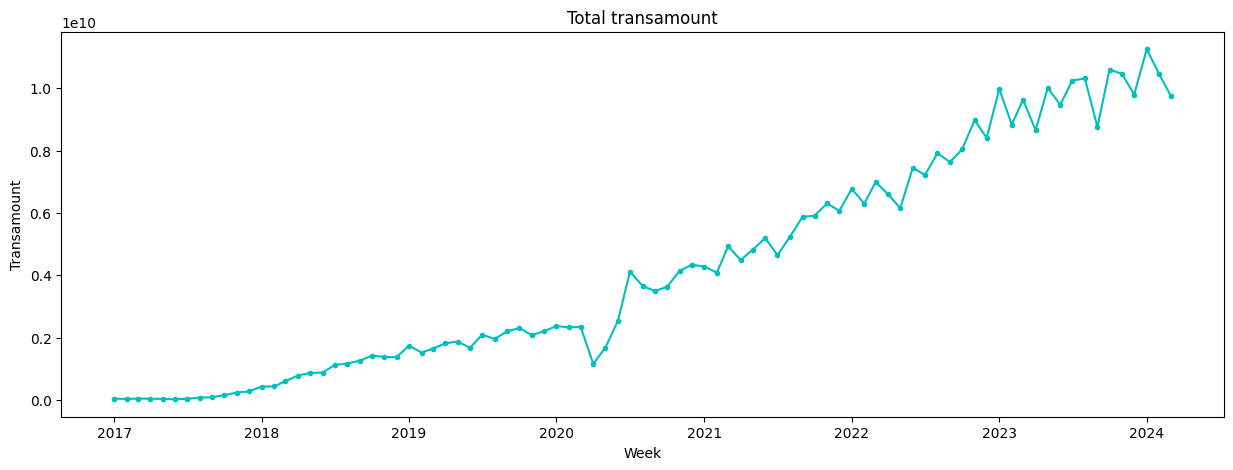

In [ ]:
plt.figure(figsize=(15,5))
plt.xlabel("Week")
plt.ylabel("Transamount")
plt.title('Total transamount')
plt.plot(df3.index, df3.transamount, color = 'c', marker='.')

# EDA

In [ ]:
Q1 = df3['transamount'].quantile(0.25)
Q3 = df3['transamount'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df3[(df3['transamount'] < lower_bound) | (df3['transamount'] > upper_bound)]

# Print the outliers (if any)
print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [transamount]
Index: []


<Axes: xlabel='transamount'>

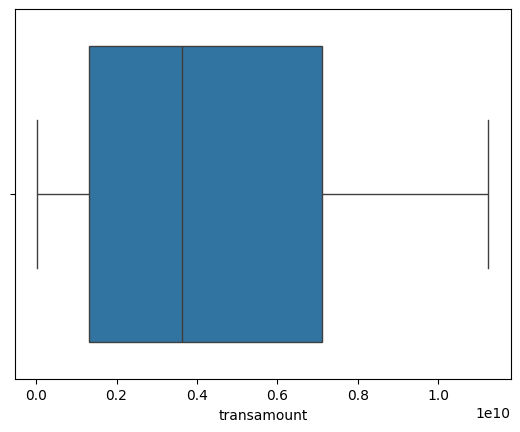

In [ ]:
sns.boxplot(df3,x='transamount')

<Figure size 640x480 with 0 Axes>

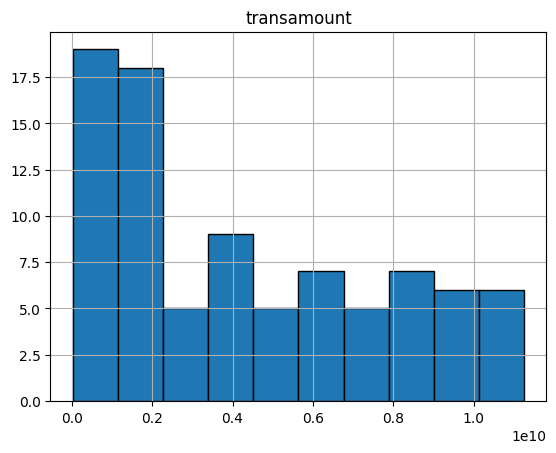

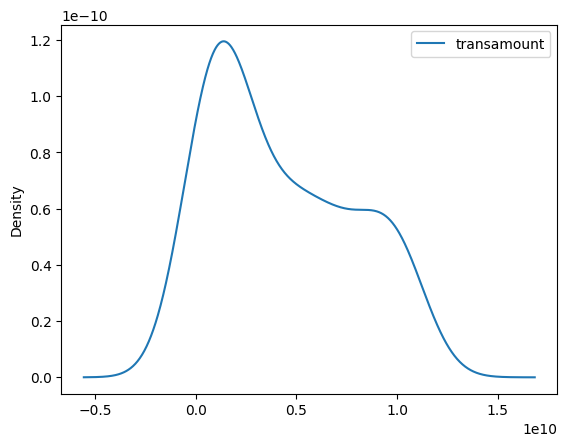

In [ ]:
plt.figure()
df3.hist(edgecolor='k')
df3.plot(kind='kde')
plt.show()

In [ ]:
# # Replace outliers with a specific value (e.g., median)
# replacement_value = 1506735021
# df3.loc[outliers.index, 'transamount'] = replacement_value

# # Print the DataFrame after replacing outliers
# print(df3)

In [ ]:
# sns.boxplot(df3,x='transamount')

In [ ]:
# Q1 = df3['transamount'].quantile(0.25)
# Q3 = df3['transamount'].quantile(0.75)

# # Calculate the IQR (Interquartile Range)
# IQR = Q3 - Q1

# # Define the lower and upper bounds for outliers detection
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Detect outliers
# outliers = df3[(df3['transamount'] < lower_bound) | (df3['transamount'] > upper_bound)]

# # Print the outliers (if any)
# print("Outliers:")
# print(outliers)

In [ ]:
# plt.figure()
# df3.hist(edgecolor='k')
# df3.plot(kind='kde')
# plt.show()

# Decomposition

In [ ]:
from statsmodels.tsa.seasonal import STL

In [ ]:
from datetime import datetime
from datetime import timedelta

In [ ]:
stl = STL(df3)
result = stl.fit()
seasonal, trend, resid = result.seasonal, result.trend, result.resid

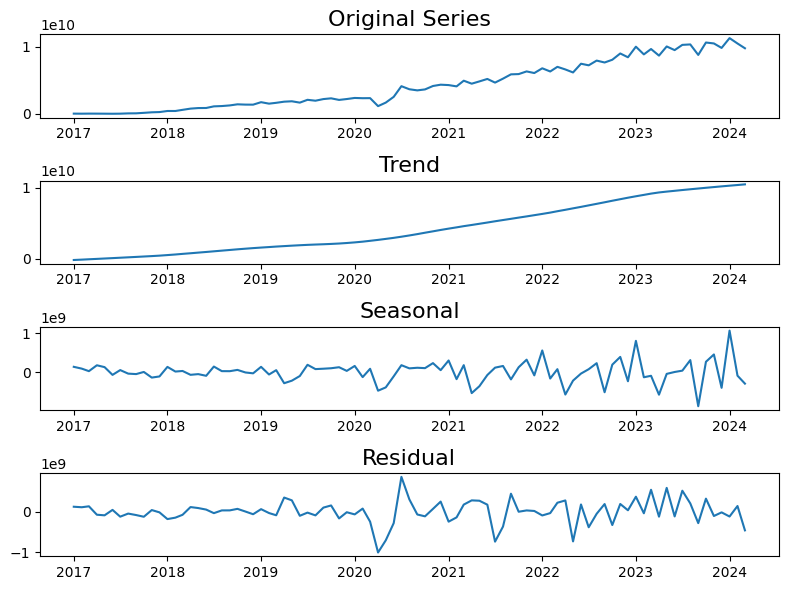

In [ ]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(df3)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

In [ ]:
# estimated = trend + seasonal
# plt.figure(figsize=(12,4))
# sns.lineplot(df3)
# sns.lineplot(estimated)

In [ ]:
# resid_mu = resid.mean()
# resid_dev = resid.std()

# lower = resid_mu - 3*resid_dev
# upper = resid_mu + 3*resid_dev

In [ ]:
# plt.figure(figsize=(10,4))
# plt.plot(resid)

# plt.fill_between([datetime(2023,1,1), datetime(2023,12,31)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
# plt.xlim(datetime(2023,1,1), datetime(2024,1,1))

In [ ]:
# anomalies = df3[(resid < lower) | (resid > upper)]
# anomalies.head()

In [ ]:
# plt.figure(figsize=(10,4))
# plt.plot(df3)
# for year in range(2023,2025):
#     plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)

# plt.scatter(anomalies.index, anomalies.transamount, color='r', marker='D')

In [ ]:
fresh_df=df3.copy(deep=True)

# Checking Stationarity

In [ ]:
# Creating function of adfuller for reuse
def test_stationarity(dataFrame, var):
    dataFrame['rollMean']  = dataFrame[var].rolling(window=6).mean()
    dataFrame['rollStd']  = dataFrame[var].rolling(window=6).std()

    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    print(stats)

    for key, values in adfTest[4].items():
        print('criticality',key,":",values)

    plt.figure(figsize=(10,5))
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var, color='b',label=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollMean', color='r',label='Moving Avg.')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollStd', color='g',label='Standard Deviation')
    plt.legend()

Test Statistic                  1.105994
p-value                         0.995267
#lags used                      4.000000
number of observations used    82.000000
dtype: float64
criticality 1% : -3.512738056978279
criticality 5% : -2.8974898650628984
criticality 10% : -2.585948732897085


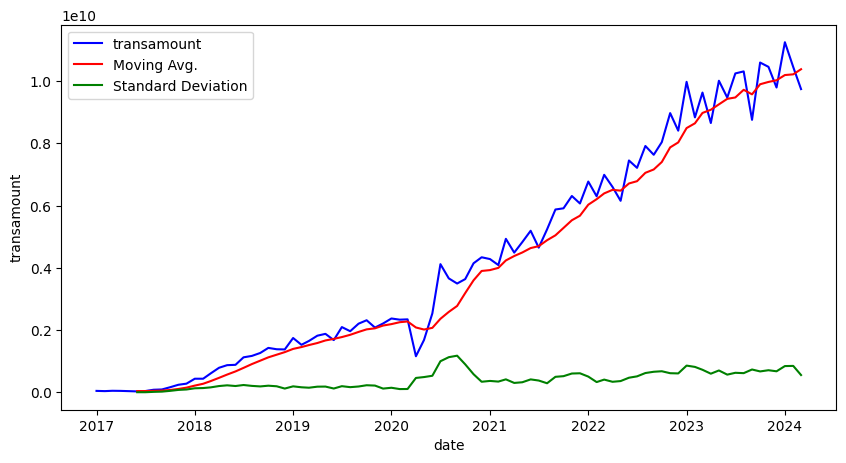

In [ ]:
test_stationarity(fresh_df,'transamount')

# Differencing

In [ ]:
air_df = df3[['transamount']]
air_df['directDiff']=air_df['transamount'].diff(6)   # by default it will make difference by 6
air_df.head()

,transamount,directDiff
date,,
2017-01-01,49773319,NaN
2017-02-01,42627926,NaN
2017-03-01,53080485,NaN
2017-04-01,49690031,NaN
2017-05-01,41803989,NaN


Test Statistic                 -1.940602
p-value                         0.313208
#lags used                      8.000000
number of observations used    72.000000
dtype: float64
criticality 1% : -3.524624466842421
criticality 5% : -2.9026070739026064
criticality 10% : -2.5886785262345677


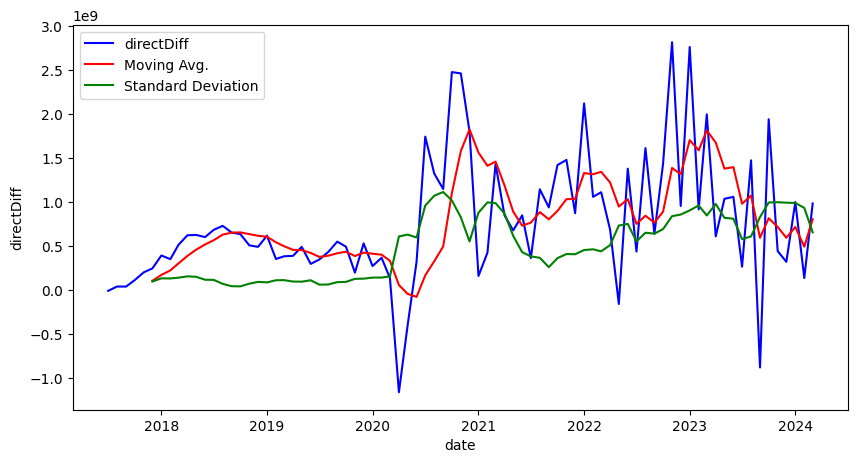

In [ ]:
test_stationarity(air_df.dropna(),'directDiff')

# Log Transformation

In [ ]:
log_df = air_df[['directDiff']]
log_df['log'] = np.log(np.abs(log_df['directDiff']))
log_df.head()

,directDiff,log
date,,
2017-01-01,NaN,NaN
2017-02-01,NaN,NaN
2017-03-01,NaN,NaN
2017-04-01,NaN,NaN
2017-05-01,NaN,NaN


Test Statistic                 -3.149595
p-value                         0.023094
#lags used                      6.000000
number of observations used    74.000000
dtype: float64
criticality 1% : -3.5219803175527606
criticality 5% : -2.9014701097664504
criticality 10% : -2.58807215485756


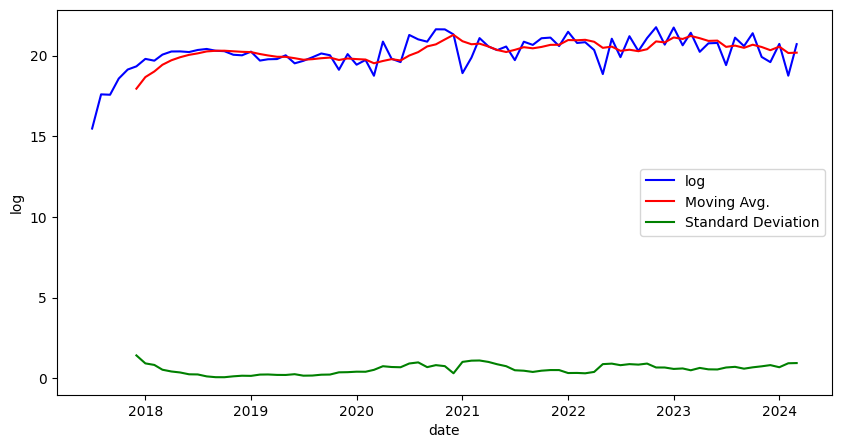

In [ ]:
test_stationarity(log_df.dropna(),'log')

<Axes: xlabel='date', ylabel='log'>

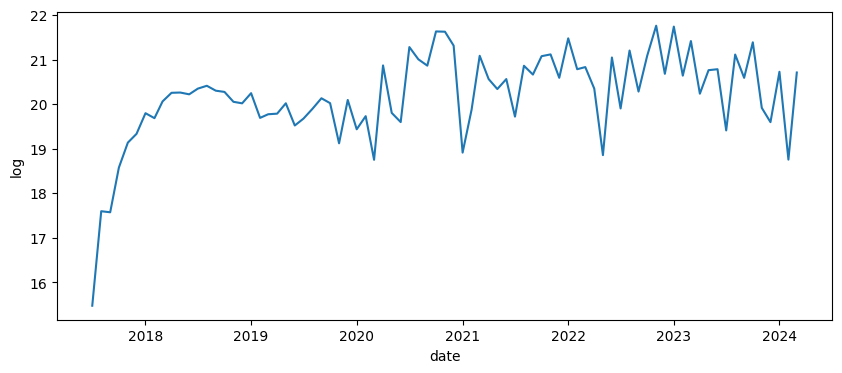

In [ ]:
log_df.dropna()
plt.figure(figsize=(10,4))
sns.lineplot(data=log_df,x=log_df.index,y='log')

In [ ]:
# rol_mean=fresh_df.rolling(window=6).mean()

# ewm=fresh_df.ewm(span=6).mean()

# rol_std=fresh_df.rolling(window=12).std()

In [ ]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# # Temperature graph with rolling mean and exponentially weighted mean ax1.plot(resample_df,label='Original')

# ax1.plot(fresh_df,label='original')
# ax1.plot(rol_mean, label='Rolling Mean')
# ax1.plot(ewm, label='Exponentially Weighted Mean')
# ax1.set_title('Temperature Changes from 1980-2013', fontsize=14)
# ax1.set_ylabel('Temperature', fontsize=12)
# ax1.set_xlabel('Year', fontsize=12)
# ax1.legend()

# # Temperature graph with rolling STD

# ax2.plot(rol_std, label='Rolling STD')
# ax2.set_title('Transaction from 2017-2024', fontsize=14)
# ax2.set_ylabel('Temperature', fontsize=12)
# ax2.set_xlabel('Year', fontsize=12)
# ax2.legend()
# plt.tight_layout()
# plt.show()

In [ ]:
# rol_mean.dropna(inplace=True)
# ewm.dropna(inplace=True)

In [ ]:
# test_stationarity(rol_mean, 'transamount')

In [ ]:
# test_stationarity(ewm, 'transamount')

In [ ]:
# diff_rol_mean=fresh_df-rol_mean
# diff_rol_mean.dropna(inplace=True)
# diff_rol_mean.head()

In [ ]:
# diff_ewm=fresh_df-ewm
# diff_ewm.dropna(inplace=True)
# diff_ewm.head()

In [ ]:
# df_rol_mean=diff_rol_mean.rolling(window=6).mean()

# df_ewm=diff_ewm.ewm(span=6).mean()

In [ ]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# # Temperature graph with rolling mean and exponentially weighted mean ax1.plot(resample_df,label='Original')

# ax1.plot(diff_rol_mean,label='original rol mean')
# ax1.plot(df_rol_mean, label='diff Rolling Mean')
# ax1.set_title('Total transamount', fontsize=14)
# ax1.set_ylabel('transamount', fontsize=12)
# ax1.set_xlabel('Year', fontsize=12)
# ax1.legend()

# # Temperature graph with rolling STD

# ax2.plot(diff_ewm, label='original ewm')
# ax2.plot(df_ewm, label='diff Exponentially Weighted Mean')
# ax2.set_title('Total transamount', fontsize=14)
# ax2.set_ylabel('transamount', fontsize=12)
# ax2.set_xlabel('Year', fontsize=12)
# ax2.legend()
# plt.tight_layout()
# plt.show()

In [ ]:
# df_rol_mean.dropna(inplace=True)
# df_ewm.dropna(inplace=True)

In [ ]:
# test_stationarity(df_rol_mean, 'transamount')

In [ ]:
# test_stationarity(df_ewm, 'transamount')

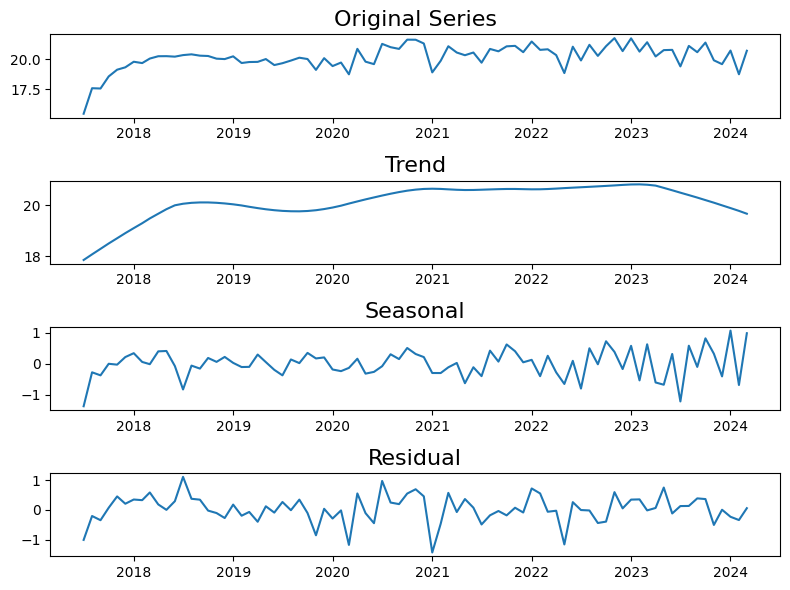

In [ ]:
stl = STL(log_df['log'].dropna())
result = stl.fit()
seasonal, trend, resid = result.seasonal, result.trend, result.resid

plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(log_df['log'].dropna())
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

In [ ]:
log_diff = log_df[['log']]
log_diff['directDiff']=log_diff['log'].diff()   # by default it will make difference by 2
log_diff.head(20)

,log,directDiff
date,,
2017-01-01,NaN,NaN
2017-02-01,NaN,NaN
2017-03-01,NaN,NaN
2017-04-01,NaN,NaN
2017-05-01,NaN,NaN
2017-06-01,NaN,NaN
2017-07-01,15.478715,NaN
2017-08-01,17.598249,2.119534
2017-09-01,17.574508,-0.023741


Test Statistic                 -4.158609
p-value                         0.000774
#lags used                      8.000000
number of observations used    71.000000
dtype: float64
criticality 1% : -3.526004646825607
criticality 5% : -2.9032002348069774
criticality 10% : -2.5889948363419957


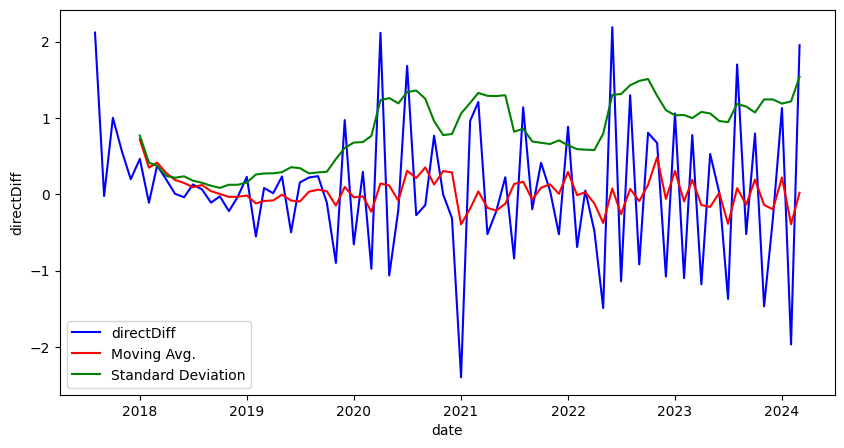

In [ ]:
test_stationarity(log_diff.dropna(), 'directDiff')

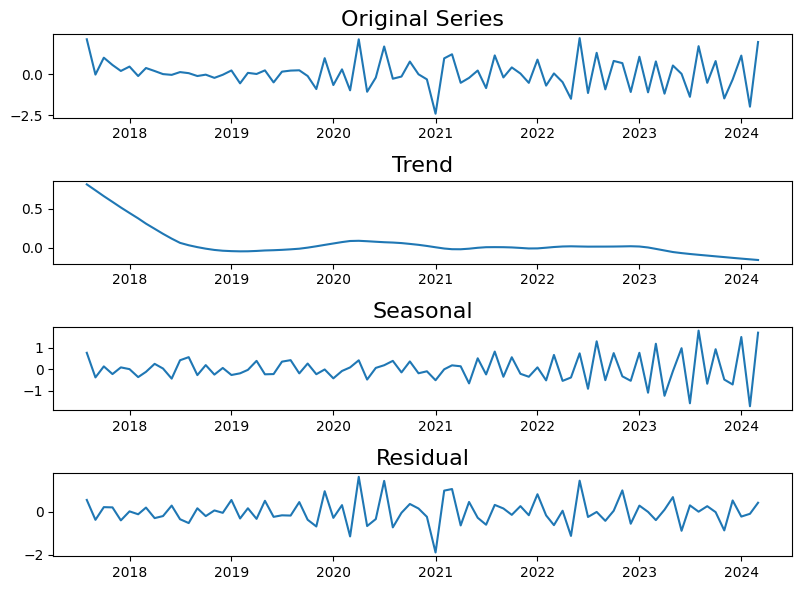

In [ ]:
stl = STL(log_diff['directDiff'].dropna())
result = stl.fit()
seasonal, trend, resid = result.seasonal, result.trend, result.resid

plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(log_diff['directDiff'].dropna())
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

In [ ]:
# f_df_series=fresh_df.transamount
# f_df_series.astype('int64')

In [ ]:
# avg, dev = f_df_series.mean(), f_df_series.std()
# avg, dev

In [ ]:
# f_df_series2 = (f_df_series - avg) / dev
# f_df_series2

In [ ]:
# def plot_series(series):
#     plt.figure(figsize=(12,6))
#     plt.plot(f_df_series2, color='red')
#     plt.ylabel('Search Frequency for "Heater"', fontsize=16)

#     for year in range(2023, 2025):
#         plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

In [ ]:
# plot_series(f_df_series2)
# plt.axhline(0, linestyle='--', color='k', alpha=0.3)

In [ ]:
# f_df_series2 = f_df_series2.diff().dropna()

In [ ]:
# f_df_series = f_df_series.diff().dropna()

In [ ]:
# def plot_series(series):
#     plt.figure(figsize=(12,6))
#     plt.plot(f_df_series, color='red')
#     plt.ylabel('Search Frequency for "Heater"', fontsize=16)

#     for year in range(2023, 2025):
#         plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

In [ ]:
# plot_series(f_df_series)
# plt.axhline(0, linestyle='--', color='k', alpha=0.3)

In [ ]:
# df4=pd.DataFrame(f_df_series)
# df4.head()

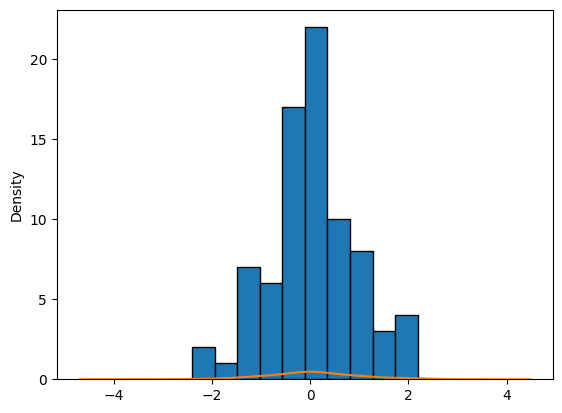

In [ ]:
plt.figure()
log_diff['directDiff'].hist(edgecolor='k')
log_diff['directDiff'].plot(kind='kde')
plt.show()

In [ ]:
# plt.figure()
# df_ewm.hist(edgecolor='k')
# df_ewm.plot(kind='kde')
# plt.show()

# Train-Test split

In [ ]:
train = log_diff[:round(len(log_diff)*70/100)]
len(train)

61

In [ ]:
test = log_diff[round(len(log_diff)*70/100):]
len(test)

26

In [ ]:
airP = log_diff[['directDiff']].copy(deep=True)
# airP['firstDiff'] = airP['transamount'].diff()
# airP['secDiff'] = airP['transamount'].diff(2)    # this is working only
# airP['Diff4'] = airP['transamount'].diff(4)
airP.head(10)

,directDiff
date,
2017-01-01,NaN
2017-02-01,NaN
2017-03-01,NaN
2017-04-01,NaN
2017-05-01,NaN
2017-06-01,NaN
2017-07-01,NaN
2017-08-01,2.119534
2017-09-01,-0.023741


#  ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error as mse
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

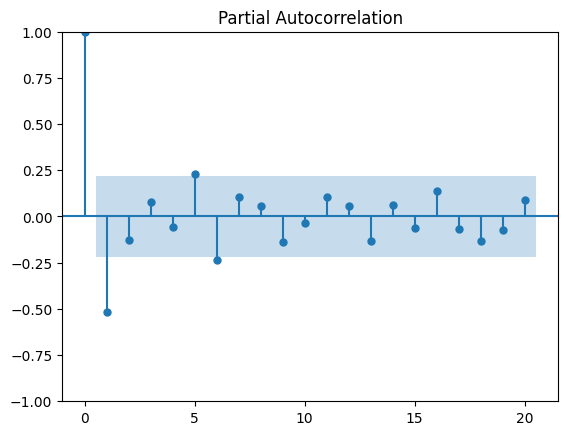

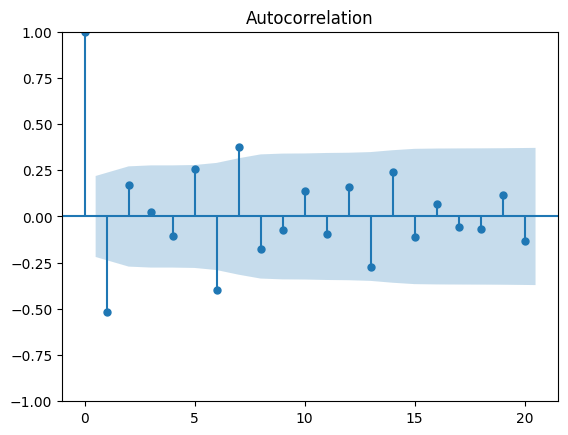

In [ ]:
plot_pacf(airP['directDiff'].dropna(),lags=20);
plot_acf(airP['directDiff'].dropna(),lags=20);

In [ ]:
# plot_pacf(df3['transamount'].dropna(),lags=20);
# plot_acf(df3['transamount'].dropna(),lags=20);

In [ ]:
import itertools
import time

# Hyper-parameter Tuning

In [ ]:
def arima_parameter(p,d,q):
  start_time = time.time()
  a=range(0,p+1)
  b=range(0,d+1)
  c=range(0,q+1)
  pdq_combination=list(itertools.product(a,b,c))
  rmse=[]
  order1=[]
  for pdq in pdq_combination:
    try:
      model=ARIMA(train['directDiff'],order=pdq).fit()
      pred=model.predict(start=test.index[0],end=test.index[-1])
      error=np.sqrt(mse(test['directDiff'],pred))
      order1.append(pdq)
      rmse.append(error)
    except:
      continue
  combined = list(zip(order1, rmse))
  lowest_rmse_tuple = min(combined, key=lambda x: x[1])
  end_time = time.time()
  elapsed_time = end_time - start_time
  output = "Order: " + str(lowest_rmse_tuple[0]) + " with lowest RMSE: " + \
            str(round(lowest_rmse_tuple[1],3))+"; Required time: " + \
            str(round(elapsed_time,2)) + " seconds"
  return output

In [ ]:
# arima_parameter(2,1,2)

'Order: (1, 1, 1) with lowest RMSE: 1.165; Required time: 3.03 seconds'

arima_parameter(2,2,3)

Order: (1, 1, 3) with lowest RMSE: 0.838; Required time: 9.81 seconds

# Model fitting

In [ ]:
model = ARIMA(train['directDiff'],order=(3,0,0))
model_fit1 = model.fit()
prediction = model_fit1.predict(start=test.index[0],end=test.index[-1])
airP['arimaPred'] = prediction
airP.tail(10)

,directDiff,arimaPred
date,,
2023-06-01,0.021866,0.093124
2023-07-01,-1.372505,0.093124
2023-08-01,1.701669,0.093123
2023-09-01,-0.522656,0.093123
2023-10-01,0.797202,0.093123
2023-11-01,-1.470602,0.093123
2023-12-01,-0.320271,0.093123
2024-01-01,1.129325,0.093123
2024-02-01,-1.969535,0.093123


# Model Evaluation

In [ ]:
MAPE=np.mean(np.abs((test['directDiff'] - prediction) / test['directDiff'])) * 100
print(f"MAPE: {MAPE:.2f}%")

MAPE: 106.30%


In [ ]:
RMSE=np.sqrt(mse(test['directDiff'],prediction))
print(f"RMSE: {RMSE:.2f}")

RMSE: 1.17


<Axes: xlabel='date', ylabel='directDiff'>

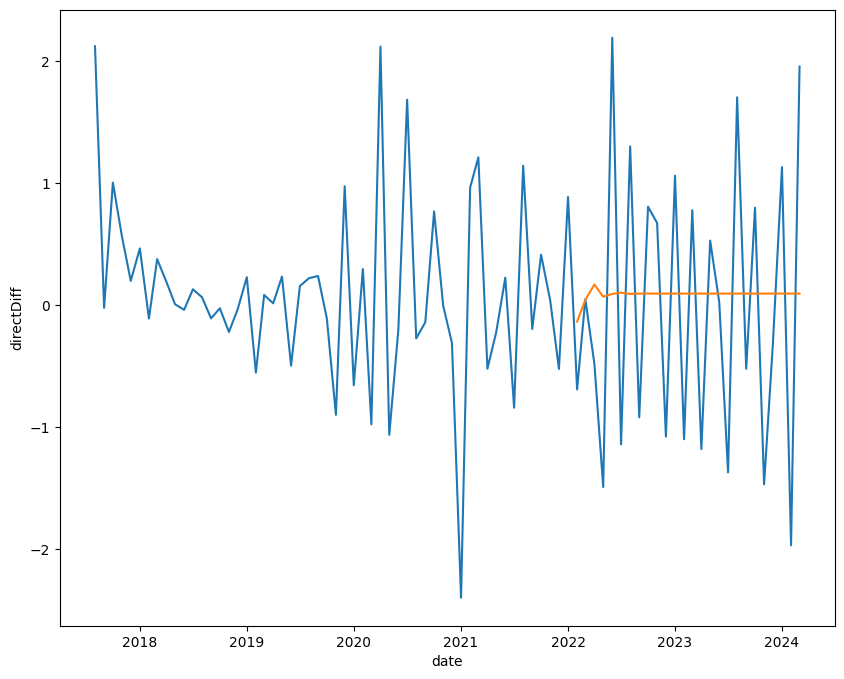

In [ ]:
airP.dropna()
plt.figure(figsize=(10,8))
sns.lineplot(data=airP,x=airP.index,y='directDiff')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')

# Future Forecast

In [ ]:
futureDate = pd.DataFrame(pd.date_range(start='2024-04-01', end='2024-09-01',freq='MS'),columns=['date'])
futureDate.set_index('date',inplace=True)
futureDate.head(20)

""
date
2024-04-01
2024-05-01
2024-06-01
2024-07-01
2024-08-01
2024-09-01


In [ ]:
model = ARIMA(train['directDiff'],order=(3,0,0))
model_fit = model.fit()
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1])

2024-04-01    0.093123
2024-05-01    0.093123
2024-06-01    0.093123
2024-07-01    0.093123
2024-08-01    0.093123
2024-09-01    0.093123
Freq: MS, Name: predicted_mean, dtype: float64

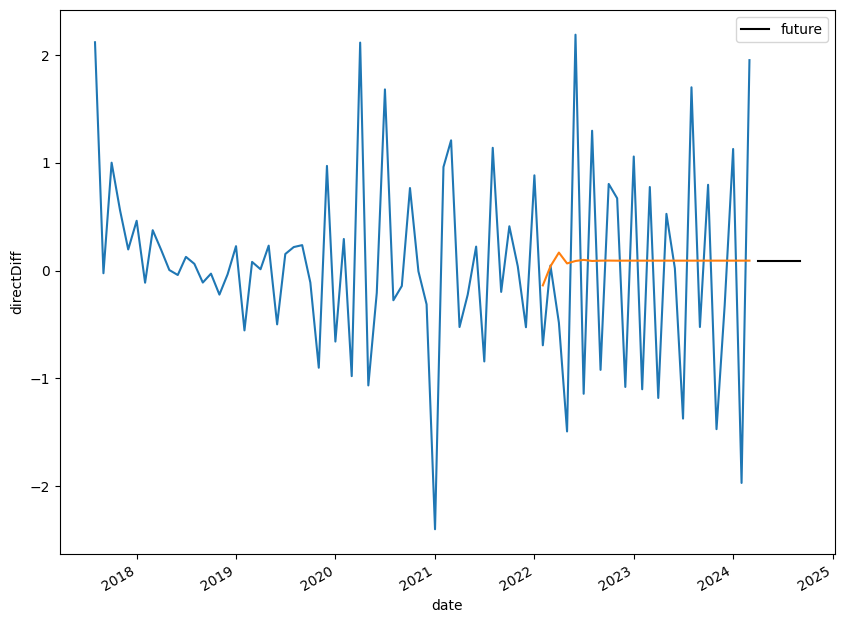

In [ ]:
airP.dropna()
plt.figure(figsize=(10,8))
sns.lineplot(data=airP,x=airP.index,y='directDiff')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black', label='future')
plt.legend()

# Undo transformation

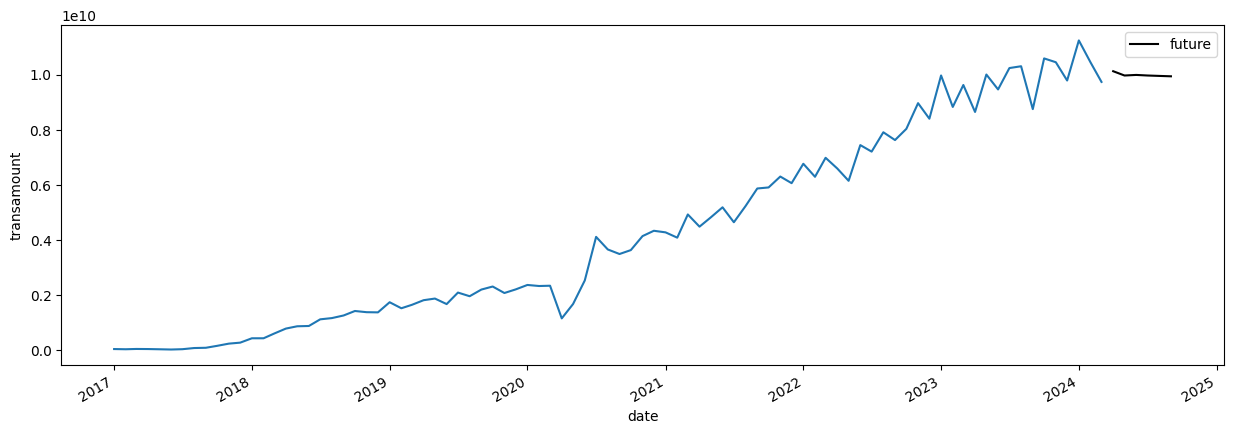

In [ ]:
model = ARIMA(df3['transamount'],order=(3,0,0))
model_fit = model.fit()
future=model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1])
plt.figure(figsize=(15,5))
sns.lineplot(data=df3,x=df3.index,y='transamount')
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black', label='future')
plt.legend()

# Seems model is not working well. So in next part I will fit LSTM model

In [ ]:
# !pip install arch

In [ ]:
# from arch import arch_model

In [ ]:
# returns = 100 * airP.transamount.pct_change().dropna()

In [ ]:
# plt.figure(figsize=(10,4))
# plt.plot(returns)

In [ ]:
# plot_pacf(returns**2)
# plt.show()

In [ ]:
# model = arch_model(returns, p=12, q=12)
# model_fit = model.fit()
# model_fit.summary()

In [ ]:
# model = arch_model(returns, p=3, q=3)
# model_fit = model.fit()
# model_fit.summary()

In [ ]:
# rolling_predictions = []
# test_size = 22

# for i in range(test_size):
#     train = returns[:-(test_size-i)]
#     model = arch_model(train, p=3, q=3)
#     model_fit = model.fit(disp='off')
#     pred = model_fit.forecast(horizon=1)
#     rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [ ]:
# rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-22:])

In [ ]:
# plt.figure(figsize=(10,4))
# true, = plt.plot(returns[-22:])
# preds, = plt.plot(rolling_predictions)
# plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
# plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)